# gpOptimizer.optimize: A Simple Black-Box Optimization

In [1]:
##first, install the latest version of gpCAM
#!pip install gpcam==8.1.11

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gpcam import GPOptimizer
from gpcam import fvGPOptimizer
import time


%load_ext autoreload
%autoreload 2

In [3]:
from itertools import product
x_pred1D = np.linspace(0,1,1000).reshape(-1,1)

## Data Prep

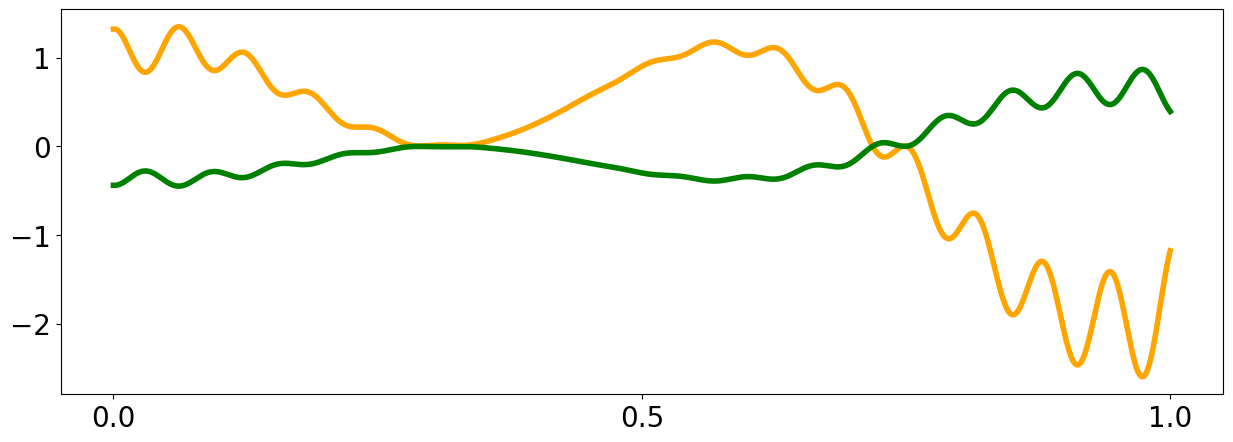

In [4]:

def f1(x):
    if np.ndim(x) == 1: return (np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)), 0.01
    else: return (np.sin(5. * x[:,0]) + np.cos(10. * x[:,0]) + (2.* (x[:,0]-0.4)**2) * np.cos(100. * x[:,0])), np.zeros(len(x)) + 0.01

def f2(x):
    if np.ndim(x) == 1: 
        res = np.array([f1(x)[0], -f1(x)[0]/3.]).reshape(2), np.array([0.01,0.01])
        return res 
    else: 
        res = np.column_stack([f1(x)[0], -f1(x)[0]/3.]).reshape(len(x),2),\
              np.array([np.zeros(len(x)) + 0.01, np.zeros(len(x)) + 0.01]).reshape(len(x),2)
        return res

plt.figure(figsize = (15,5))
plt.xticks([0.,0.5,1.0])
plt.yticks([-2,-1,0.,1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x_pred1D,f1(x_pred1D)[0], color = 'orange', linewidth = 4)
plt.plot(x_pred1D,f2(x_pred1D)[0][:,1], color = 'green', linewidth = 4)

## Initialization and Optimization for a Scalar Valued Function

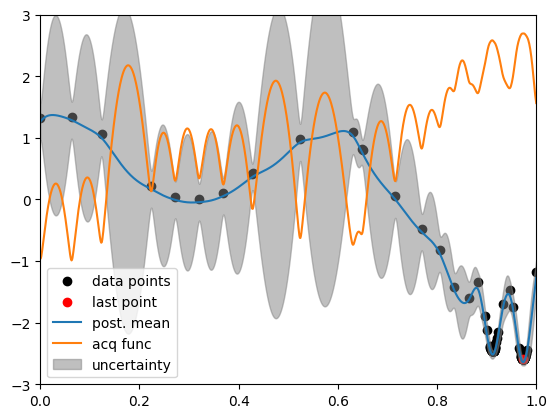

In [5]:
from IPython.display import clear_output
my_gp1 = GPOptimizer()
def callb(x,y):
    clear_output(wait=True)
    plt.scatter(x, y, color = 'black', label = "data points")
    plt.scatter(x[-1], y[-1], color = 'red', label = "last point")
    m = my_gp1.posterior_mean(x_pred1D)["f(x)"]
    s = np.sqrt(my_gp1.posterior_covariance(x_pred1D)["v(x)"])
    plt.plot(x_pred1D, m, label = "post. mean")
    plt.plot(x_pred1D, -(m-3.*s), label =  "acq func")
    plt.fill_between(x_pred1D.flatten(), m-3.*s, m+3.*s, label = "uncertainty", color = "grey", alpha = .5)
    plt.xlim([0,1])
    plt.ylim(-3,3)
    plt.legend(loc = 'lower left')
    plt.show()
    
result = my_gp1.optimize(func = f1, search_space =  np.array([[0,1]]), callback=callb)


## Initialization and Optimization for a Vector Valued Function

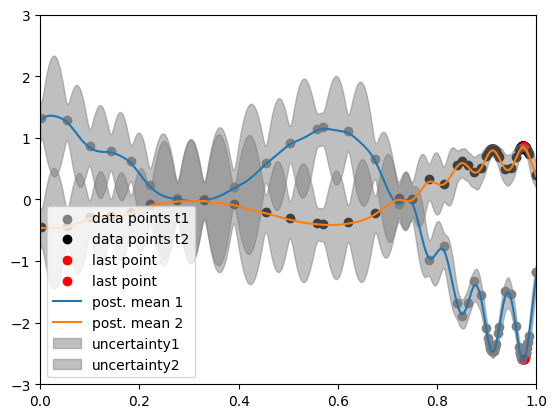

In [6]:
from IPython.display import clear_output
my_gp2 = fvGPOptimizer()
def callb(x,y):
    task_ind0 = np.where(x[:,1]==0.)[0]
    task_ind1 = np.where(x[:,1]==1.)[0]
    clear_output(wait=True)
    y1 = y[task_ind0]
    y2 = y[task_ind1]
    x = x[task_ind0,0:1]
    plt.scatter(x[:,0], y1, color = 'grey', label = "data points t1")
    plt.scatter(x[:,0], y2, color = 'black', label = "data points t2")
    plt.scatter(x[-1,0], y1[-1], color = 'red', label = "last point")
    plt.scatter(x[-1,0], y2[-1], color = 'red', label = "last point")
    m = my_gp2.posterior_mean(x_pred1D, x_out = np.array([0,1]))["f(x)"]
    s = np.sqrt(my_gp2.posterior_covariance(x_pred1D, x_out = np.array([0,1]))["v(x)"])
    m1 = m[:,0]
    m2 = m[:,1]
    s1 = s[:,0]
    s2 = s[:,1]
    plt.plot(x_pred1D, m1, label = "post. mean 1")
    plt.plot(x_pred1D, m2, label = "post. mean 2")
    #plt.plot(x_pred1D, -(m-3.*s), label =  "acq func")
    plt.fill_between(x_pred1D.flatten(), m1-3.*s1, m1+3.*s1, label = "uncertainty1", color = "grey", alpha = .5)
    plt.fill_between(x_pred1D.flatten(), m2-3.*s2, m2+3.*s2, label = "uncertainty2", color = "grey", alpha = .5)
    plt.xlim([0,1])
    plt.ylim(-3,3)
    plt.legend(loc = 'lower left')
    plt.show()
    
result = my_gp2.optimize(func = f2, x_out = np.array([0,1]), search_space =  np.array([[0,1]]), callback = callb)